# Natural Language Processing (NLP) Practice Notebook

In [1]:
import nltk 

In [4]:
#nltk.download_shell()

In [5]:
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [6]:
print(len(messages))

5574


In [7]:
for mess_no,message in enumerate(messages[:10]):
    print(mess_no,message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

In [8]:
# Take a look at first message to understand the dataset more. We can see that (\t) our file is a tab seperated file.
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [9]:
# let's use our pandas knowledge.

import pandas as pd

In [24]:
# Let's import messages as a dataset and take a look at them.
messages = pd.read_csv('smsspamcollection/SMSSpamCollection', sep = '\t', names = ['label','message'])
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [25]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [26]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [27]:
messages['length']  = messages['message'].apply(len)
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

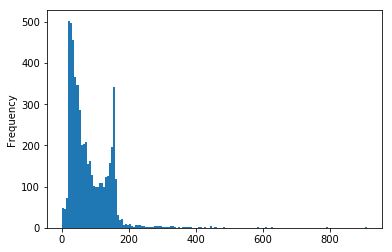

In [29]:
messages['length'].plot.hist(bins=150)

In [30]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [31]:
messages[messages['length'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001841B9510B8>,
      dtype=object)

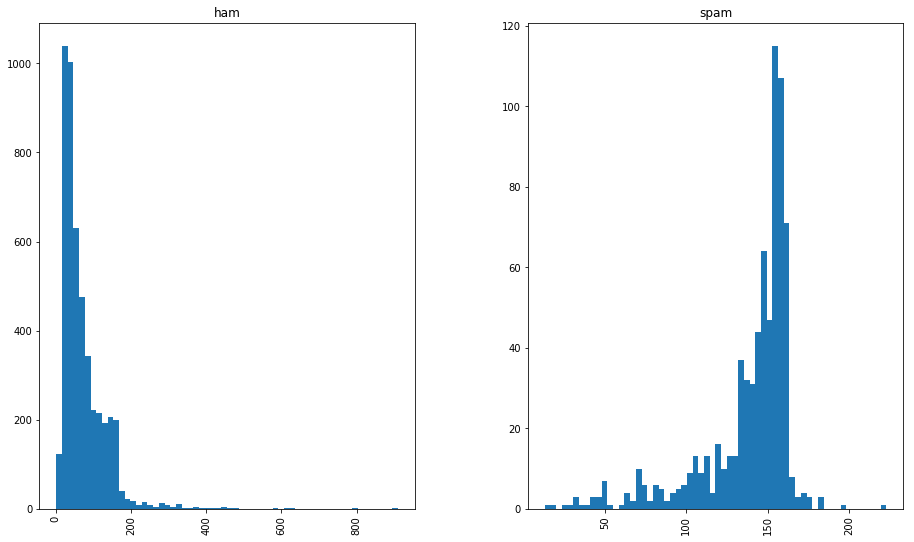

In [35]:
messages.hist(column = 'length',by = 'label',bins = 60, figsize = (15,9))

In [36]:
import string

mess = 'Sample message! Notice: it has punctuation.'

In [37]:
# This is how we get rid of the punctuations in text.

nopunc = [c for c in mess if c not in string.punctuation]

nopunc

['S',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'm',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 'N',
 'o',
 't',
 'i',
 'c',
 'e',
 ' ',
 'i',
 't',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n']

In [39]:
from nltk.corpus import stopwords

# Now we can get rid of the punc using join function.
nopunc = ''.join(nopunc)
nopunc

'Sample message Notice it has punctuation'

In [40]:
# Now we can split them from each other with split functiom.

nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [41]:
# Let's clear the message and assing it to the new variable.

clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [42]:
clean_mess 

['Sample', 'message', 'Notice', 'punctuation']

In [44]:
# Let's put all those in a method.

def text_process(mess):
    """
    1. remove punc
    2. remove stup words
    3. return list of clean text
    """
    
    nopunc = [char for char in mess if char not in string.punctuation]
    
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [45]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [47]:
# Let's tokenize our messages.

messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

# Vectorization

In [48]:
from sklearn.feature_extraction.text import CountVectorizer

In [49]:
# Bag of words and count vector analyzer. To get the vector of words appearence in a message. 2D vector with message columns and words rows...

bow_transformer = CountVectorizer(analyzer = text_process).fit(messages['message'])

In [50]:
# Word counts

print(len(bow_transformer.vocabulary_))

11425


In [52]:
# 4th message

mess4 = messages['message'][3]
print(mess4)

U dun say so early hor... U c already then say...


In [53]:
# Transformed version of our 4th message

bow4 = bow_transformer.transform([mess4])
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [54]:
# Let's see what's the 9554th item in our bow vector.

bow_transformer.get_feature_names()[9554]

'say'

In [55]:
# Let's transform all the messages in to the bag of words format via transform method.

messages_bow = bow_transformer.transform(messages['message'])

In [58]:
# How many words and messages there. 5572 messages and 11425 words.
print('Shape of Sparse Matrix: ' , messages_bow.shape)

Shape of Sparse Matrix:  (5572, 11425)


In [59]:
# Non zero values inside the bag of words.
messages_bow.nnz

50548

In [61]:
# Counting
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format((sparsity)))

sparsity: 0.07940295412668218


In [62]:
from sklearn.feature_extraction.text import TfidfTransformer


tfidf_trans = TfidfTransformer().fit(messages_bow)

In [65]:
tfidf4 = tfidf_trans.transform(bow4)
print (tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [66]:
# Frequency of word university in the messages

tfidf_trans.idf_[bow_transformer.vocabulary_['university']]

8.527076498901426

In [67]:
messages_tfidf = tfidf_trans.transform(messages_bow)

## Classfication with Naive Bayes

In [69]:
from sklearn.naive_bayes import MultinomialNB

# Creating and fitting our model with the frequency of messages and spam label.
spam_detect_model = MultinomialNB().fit(messages_tfidf,messages['label'])

In [70]:
# Let's predict our 4th message's label.
spam_detect_model.predict(tfidf4)[0]

'ham'

In [71]:
# Let's see if we predicted correctly!
messages['label'][3]

'ham'

In [72]:
# Looks like we predicted correct. Now let's predict all the messages' labels.

all_pred = spam_detect_model.predict(messages_tfidf)

In [74]:
# We trained our model on all of our training data and this leads to overfitting. So we should split our dataset.

from sklearn.model_selection import train_test_split

msg_train,msg_test,label_train,label_test = train_test_split(messages['message'],messages['label'],test_size = 0.3)

In [75]:
# Now let's do a sklearn pipeline in order tho train our model after the split for a new model.

from sklearn.pipeline import Pipeline

In [82]:
# Pipeline creation with CountVectorizer, Term Freq-Inverse Doc. Freq Transformer and Classifier.

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer = text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

In [77]:
# Fitterd our pipeline with the train dataset. We let all the previous work we've done to the pipeline.

pipeline.fit(msg_train,label_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x000001841D779048>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocesso...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [78]:
# Predicted via our pipelined model.

pred = pipeline.predict(msg_test)

In [81]:
#Evaluation via classification_report.

from sklearn.metrics import classification_report

print (classification_report(label_test,pred))

              precision    recall  f1-score   support

         ham       0.95      1.00      0.97      1438
        spam       1.00      0.68      0.81       234

   micro avg       0.95      0.95      0.95      1672
   macro avg       0.97      0.84      0.89      1672
weighted avg       0.96      0.95      0.95      1672

